In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate  #for tablular format

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

# FUNCTIONS

### ***Data checking***

In [78]:
def datacheck(data):

    print(f"Rows: {data.shape[0]}\tColumns: {data.shape[1]}")
    table_data = []

    for i in data.columns:
      table_data.append([i, len(data[i].unique()), data[i].isna().sum(), data[i].dtypes])
    print(tabulate(table_data, headers=["Column", "Total Unique Values", "Missing Values","Data Type"], tablefmt="fancy_grid"))

### ***Scatter Plot***

In [79]:
def pairplt(a,b,data):

  plt.figure(figsize=(15,10)) 
  sns.pairplot(data, x_vars=a, y_vars=b, height=3)
  plt.show()
    
  return

### Correlation

In [80]:
def Correlaton(x):

  dfa=x
  sns.heatmap(dfa.corr(), annot=True)
  plt.show()

  return     

### MODELS

In [119]:
def mod(model,x_train_std, x_test_std, y_train, y_test):

    print(f"Train accuracy: {model.score(x_train_std, y_train)} \nTest accuracy: {model.score(x_test_std, y_test)}\n")

    #classification_report
    y_pred = model.predict(x_test_std)
    

    
    mse = mean_squared_error(y_test, y_pred)  #Mean Square Error
    rmse = np.sqrt(mse)                           #RMSE
    mae = mean_absolute_error(y_test, y_pred) #Mean Absolute Error
    r_squared = r2_score(y_test, y_pred)      #R Square

    return print(f"LINEAR REGRESSION \nMean Squared Error (MSE): {mse} \nRoot Mean Squared Error (RMSE): {rmse} \nMean Absolute Error (MAE): {mae} \nR-squared (R²): {r_squared} \n")

# DATASET

In [82]:
df = pd.read_csv("C:/Users/palla/Downloads/Python/Data_science/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [83]:
datacheck(df)

Rows: 200	Columns: 4
╒═══════════╤═══════════════════════╤══════════════════╤═════════════╕
│ Column    │   Total Unique Values │   Missing Values │ Data Type   │
╞═══════════╪═══════════════════════╪══════════════════╪═════════════╡
│ TV        │                   190 │                0 │ float64     │
├───────────┼───────────────────────┼──────────────────┼─────────────┤
│ Radio     │                   167 │                0 │ float64     │
├───────────┼───────────────────────┼──────────────────┼─────────────┤
│ Newspaper │                   172 │                0 │ float64     │
├───────────┼───────────────────────┼──────────────────┼─────────────┤
│ Sales     │                   121 │                0 │ float64     │
╘═══════════╧═══════════════════════╧══════════════════╧═════════════╛


# Graphs

<Figure size 1500x1000 with 0 Axes>

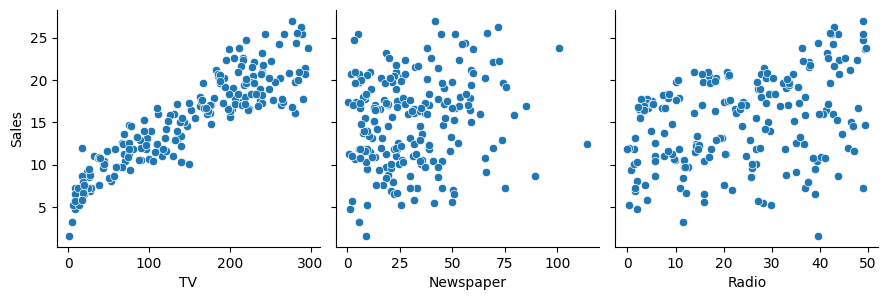

In [84]:
pairplt(['TV', 'Newspaper', 'Radio'],'Sales',df)

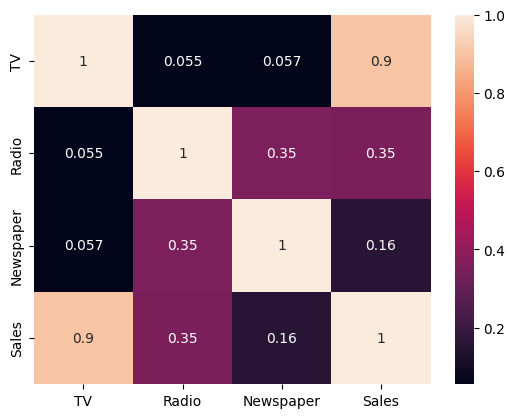

In [85]:
Correlaton(df)

We find sales and TV as to be most correlated

# Modelling

### 80:20 Training : Test

In [100]:
X = df[['TV']]
y = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(X,y, shuffle=True, test_size=0.2, random_state=99)

In [104]:
c = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [120]:
mod(lin_reg,x_train, x_test, y_train, y_test)

Train accuracy: 0.8014556115433394 
Test accuracy: 0.8494867027159927

LINEAR REGRESSION 
Mean Squared Error (MSE): 4.042139017162006 
Root Mean Squared Error (RMSE): 2.010507154218061 
Mean Absolute Error (MAE): 1.6298809732075163 
R-squared (R²): 0.8494867027159927 



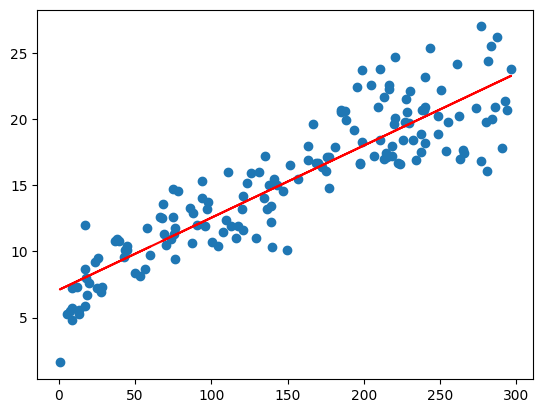

In [130]:
plt.scatter(x_train, y_train)
plt.plot(x_train, lin_reg.intercept_ + lin_reg.coef_[0]*x_train, 'r')
plt.show()

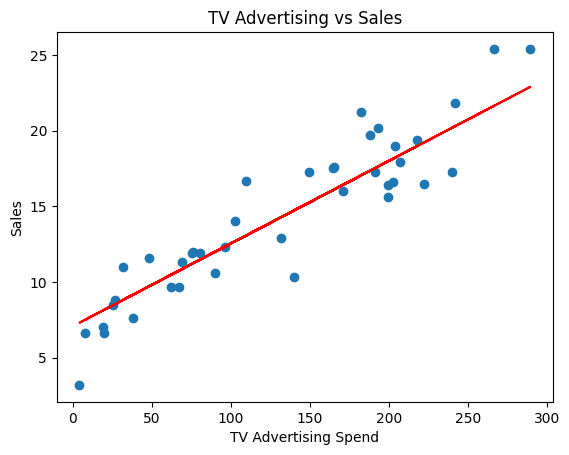

In [134]:
plt.scatter(x_test, y_test)
plt.plot(x_test, lin_reg.intercept_ + lin_reg.coef_[0] * x_test, 'r')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.title('TV Advertising vs Sales')
plt.show()